<a href="https://colab.research.google.com/github/Muhliscm/Course-era-captone/blob/master/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [ ]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [ ]:
ratings_df.shape

(463, 19)

In [ ]:
ratings_df['students'].mean()

36.62419006479482

In [ ]:
ratings_df['students'].median()

23.0

In [ ]:
ratings_df['students'].min()

5

In [ ]:
ratings_df['students'].max()

380

In [ ]:
ratings_df.describe(include='all')

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463,463.000000,463,463,4.630000e+02,463.000000,463,463,463,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
unique,2,NaN,2,2,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,no,NaN,male,more,NaN,NaN,upper,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,399,NaN,268,436,NaN,NaN,306,435,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,48.365011,NaN,NaN,6.271140e-08,3.998272,NaN,NaN,NaN,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,NaN,9.802742,NaN,NaN,7.886477e-01,0.554866,NaN,NaN,NaN,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,NaN,29.000000,NaN,NaN,-1.450494e+00,2.100000,NaN,NaN,NaN,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,42.000000,NaN,NaN,-6.562689e-01,3.600000,NaN,NaN,NaN,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,NaN,48.000000,NaN,NaN,-6.801430e-02,4.000000,NaN,NaN,NaN,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,NaN,57.000000,NaN,NaN,5.456024e-01,4.400000,NaN,NaN,NaN,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000


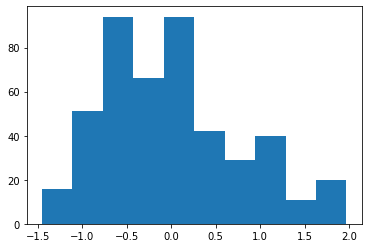

In [ ]:
plt.hist(ratings_df['beauty'])
plt.show()

In [ ]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

In [ ]:
tenure_count = ratings_df.groupby('gender').agg({'tenure':'count'}).reset_index()

In [ ]:
tenure_count['percentage'] = 100 * tenure_count.tenure/ tenure_count.tenure.sum()

In [ ]:
tenure_count

,gender,tenure,percentage
0,female,195,42.116631
1,male,268,57.883369


In [26]:
minorites = ratings_df.groupby('gender').agg({'minority':'count'}).reset_index()

In [28]:
minorites['percentage'] = 100 * minorites.minority / minorites.minority.sum()

In [29]:
minorites

,gender,minority,percentage
0,female,195,42.116631
1,male,268,57.883369


In [31]:
tenure_count = ratings_df.groupby('minority').agg({'tenure':'count'}).reset_index()

In [32]:
tenure_count['percentage'] = 100 * tenure_count.tenure / tenure_count.tenure.sum()

In [33]:
tenure_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


In [35]:
ratings_df.groupby('tenure').agg({'age':['mean', 'std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <a list of 10 Patch objects>)

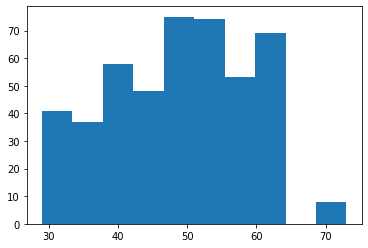

In [37]:
plt.hist(ratings_df['age'])

In [39]:
ratings_df.groupby('tenure').agg({'eval':'median'}).reset_index()

,tenure,eval
0,no,4.2
1,yes,4.0


In [40]:
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

4.0